In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
bank = pd.read_csv('/content/drive/MyDrive/bank-full.csv', sep=';')
bank.shape

(45211, 17)

## 이상치

In [10]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## 결측치

In [13]:
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


1. campaign, pdays, previous: 연속형



2. poutcome, y: 범주형

In [14]:
df = bank.copy()

### 범주형 변수

In [15]:
cols_cat = df.select_dtypes(include=['object'])
cols_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [16]:
cols_cat['poutcome'].value_counts()

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


In [17]:
cols_cat['y'].value_counts()

,count
y,
no,39922
yes,5289


### 연속형 변수

In [18]:
cols_num = df.select_dtypes(include=['number'])
cols_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


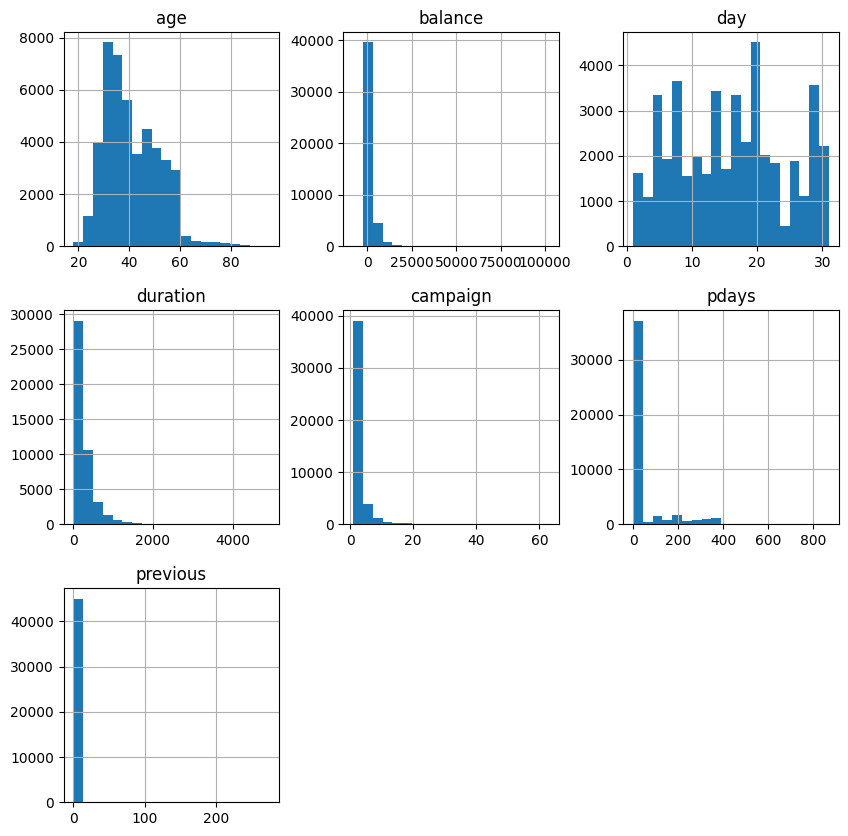

In [19]:
cols_num.hist(figsize=(10,10), bins=20)
plt.show()

In [20]:
cols_num['pdays'].value_counts()

,count
pdays,
-1,36954
182,167
92,147
91,126
183,126
...,...
449,1
452,1
648,1


### 이상치 확인

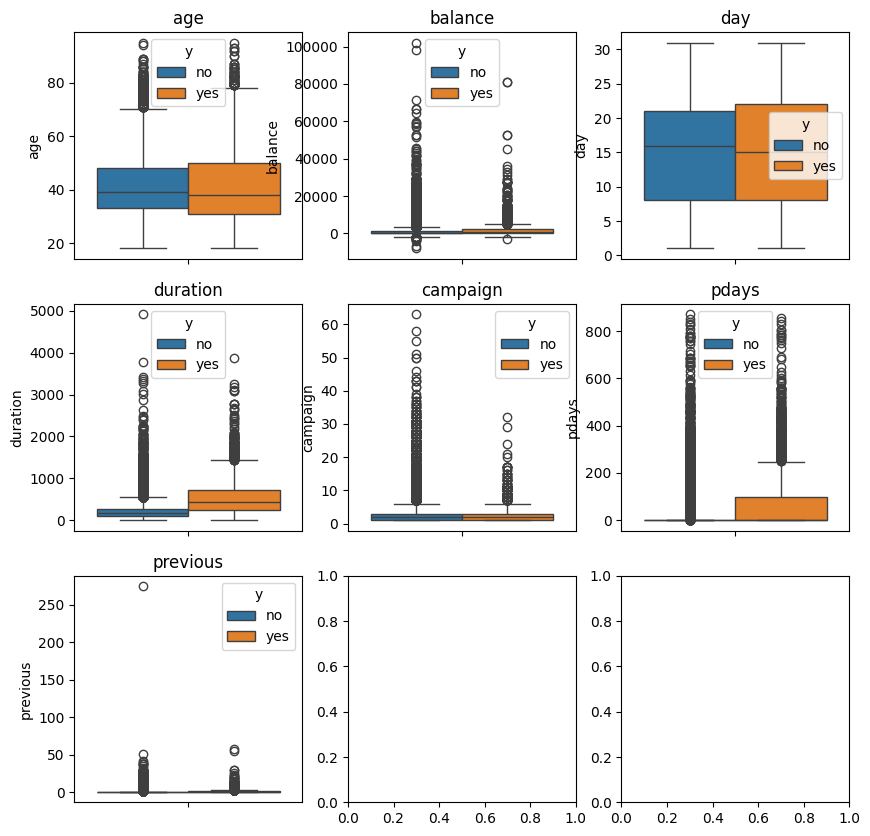

In [21]:
#Boxplot
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(cols_num.columns):
  sns.boxplot(y=col, data=cols_num, ax=axes[i], hue=df['y'])
  axes[i].set_title(col)

plt.show()

### EDA

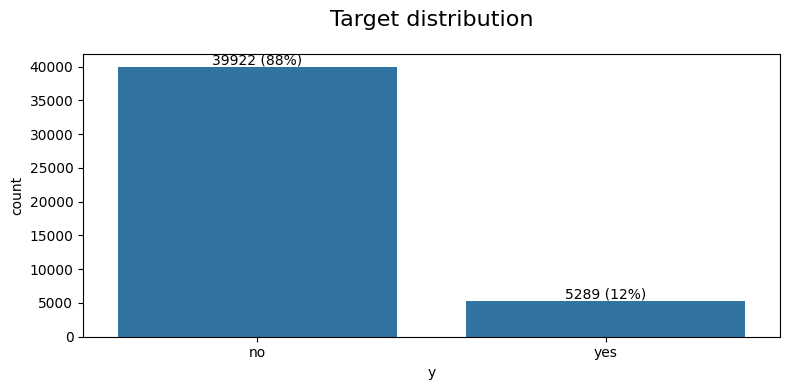

In [22]:
# Target distribution이 imbalanced -> Decision tree based algorithm을 활용하기에 좋음

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df['y'], ax=ax)

abs_vals = df['y'].value_counts()
rel_vals = df['y'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution', fontsize=16, pad=20)

plt.tight_layout();

### Correlation Matrix

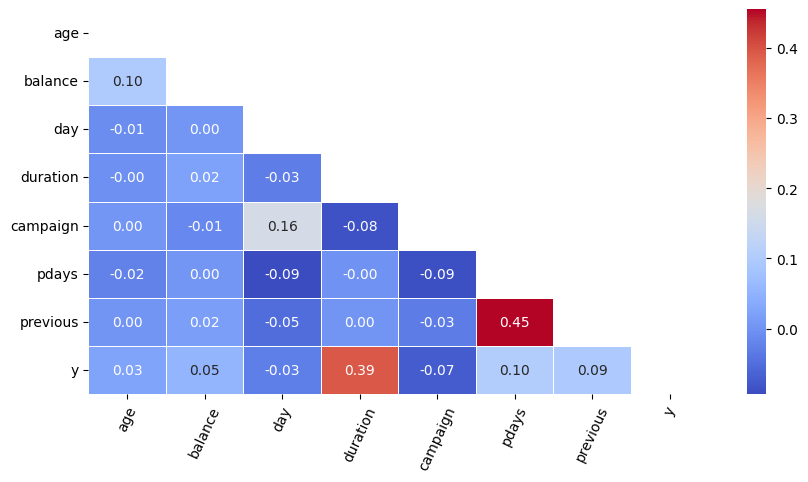

In [23]:
c_for_c = df.copy()

c_for_c['y'] = c_for_c['y'].apply(lambda x: 1 if x == 'yes' else 0)

columns_of_interest = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

subset_df = c_for_c[columns_of_interest]

df_corr = subset_df.corr(method='pearson')

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.show()

### Duration

In [24]:
df['duration'].value_counts()

,count
duration,
124,188
90,184
89,177
104,175
122,175
...,...
1833,1
1545,1
1352,1


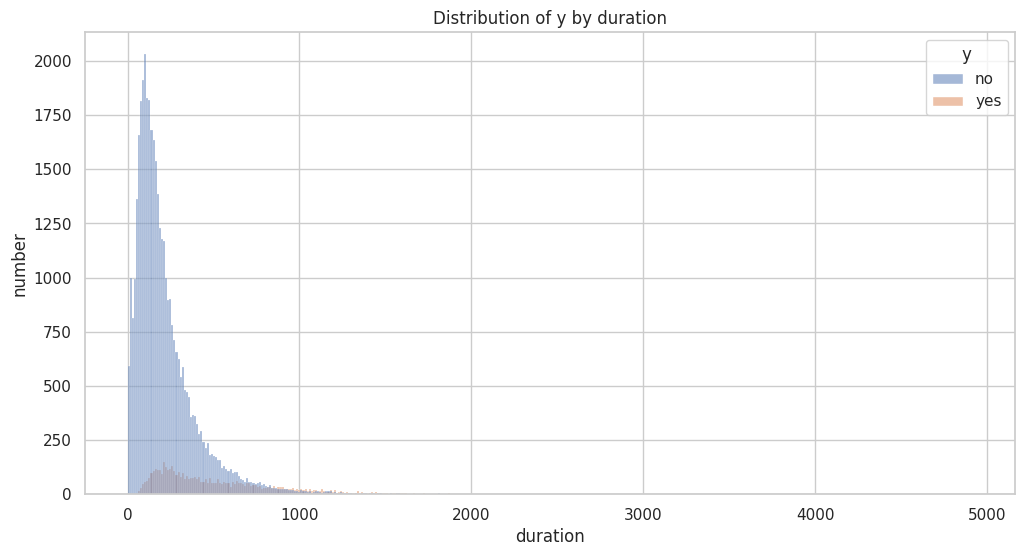

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(x='duration', hue='y', data=df)

plt.title('Distribution of y by duration')
plt.xlabel('duration')
plt.ylabel('number')
plt.show()

###Duration feature 해석

In [27]:
#Duration feature은 call이 수행되기 전에 알 수 없으며 y는 call이 수행된 이후 결정되므로 현실적인 예측 모델에서 포함되어서는 안 되는 feature임.


### Month

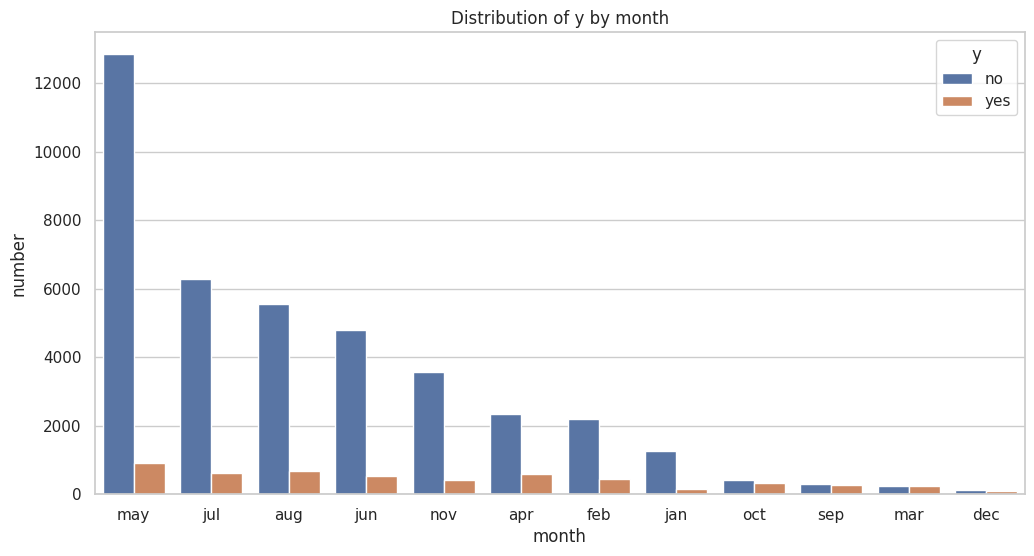

In [28]:
#Count

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='y', data=df, order=df['month'].value_counts().index)

plt.title('Distribution of y by month')
plt.xlabel('month')
plt.ylabel('number')
plt.legend(title='y', loc='upper right')
plt.show()

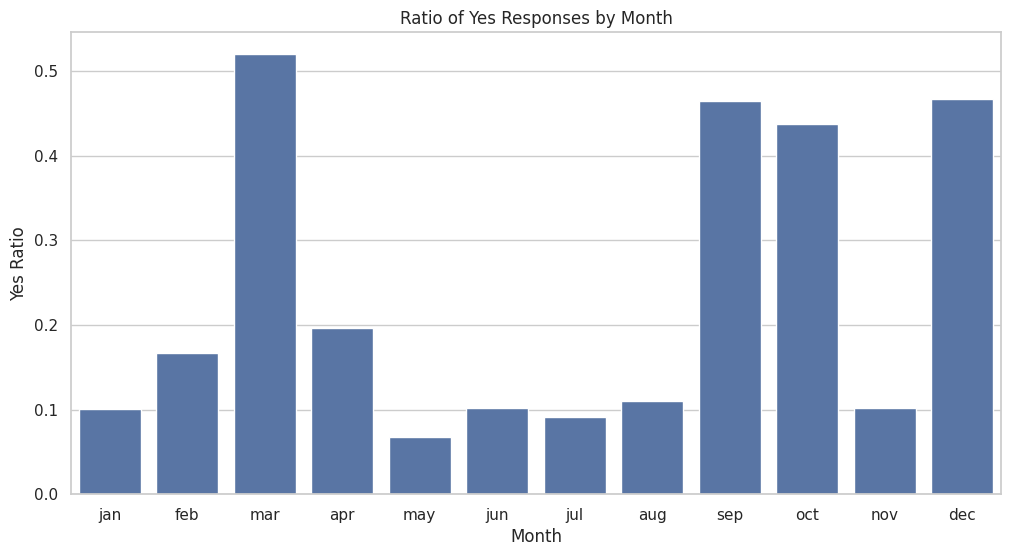

In [29]:
#Ratio

month_yes_ratio = c_for_c.groupby('month')['y'].mean().reset_index()

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_yes_ratio['month'] = pd.Categorical(month_yes_ratio['month'], categories=month_order, ordered=True)
month_yes_ratio = month_yes_ratio.sort_values('month')

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='y', data=month_yes_ratio, order=month_order, palette=None)

plt.title('Ratio of Yes Responses by Month')
plt.xlabel('Month')
plt.ylabel('Yes Ratio')
plt.show()

### Categorical Feature

### Contact

In [30]:
df['contact'].value_counts()

,count
contact,
cellular,29285
unknown,13020
telephone,2906


In [31]:
df.groupby('contact')['y'].value_counts()

contact    y  
cellular   no     24916
           yes     4369
telephone  no      2516
           yes      390
unknown    no     12490
           yes      530
Name: count, dtype: int64

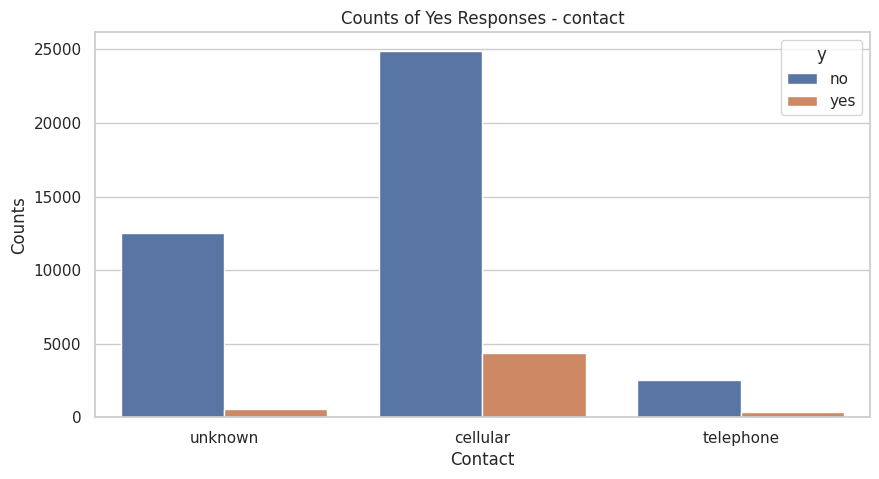

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x='contact', hue='y', data=df)

plt.title('Counts of Yes Responses - contact')
plt.xlabel('Contact')
plt.ylabel('Counts')
plt.show()

<ipython-input-33-91781a9c35c9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contact', y='y', data=contact_yes_ratio, palette='coolwarm')


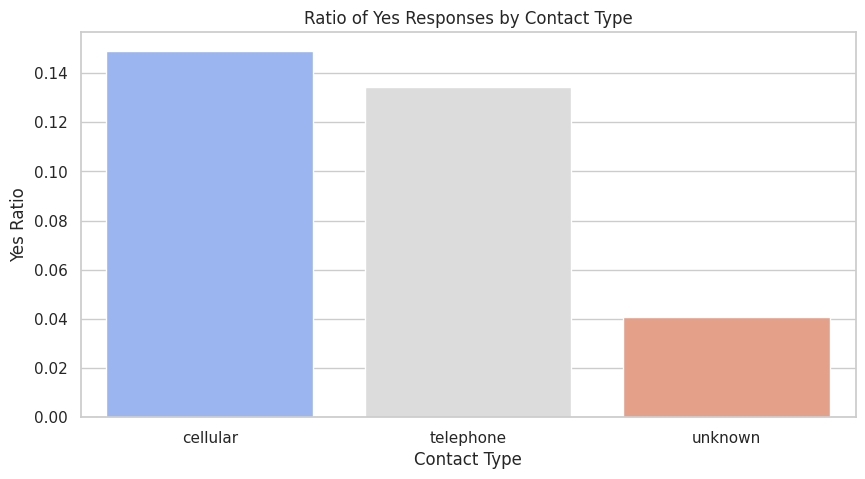

In [33]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate the ratio of 'yes' responses for each contact type
contact_yes_ratio = df.groupby('contact')['y'].mean().reset_index()

# Plot the ratio
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='contact', y='y', data=contact_yes_ratio, palette='coolwarm')

plt.title('Ratio of Yes Responses by Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Yes Ratio')
plt.show()

### Education

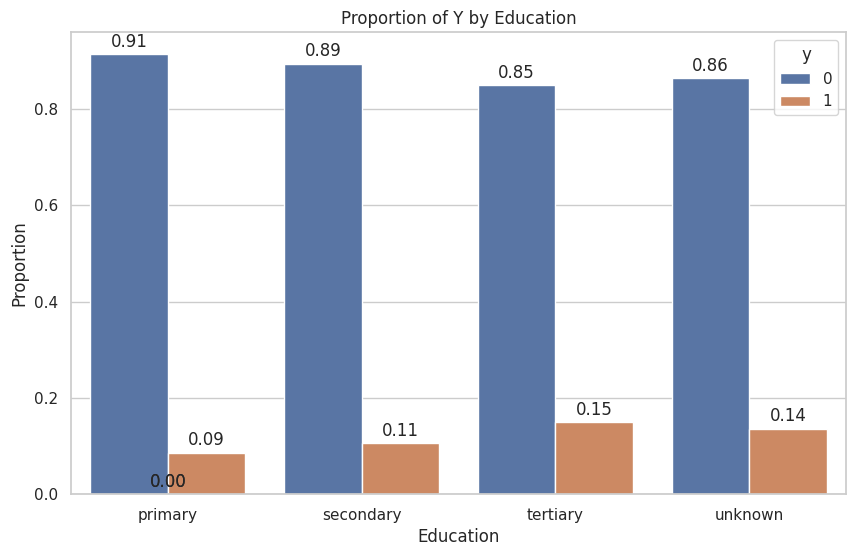

In [34]:
# 비율 계산을 위한 데이터프레임 변환
education_counts = df['education'].value_counts().reset_index()
education_counts.columns = ['education', 'total']

education_y_counts = df.groupby(['education', 'y']).size().reset_index(name='count')
education_y_counts = education_y_counts.merge(education_counts, on='education')
education_y_counts['proportion'] = education_y_counts['count'] / education_y_counts['total']

# 비율 시각화
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=education_y_counts, x='education', y='proportion', hue='y')

# 각 막대 위에 수치 표시
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(format(height, '.2f'),
                     (p.get_x() + p.get_width() / 2., height),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # 수치를 막대 바로 위에 표시
                     textcoords = 'offset points')

plt.title('Proportion of Y by Education')
plt.ylabel('Proportion')
plt.xlabel('Education')
plt.show()

## Train Test 분리

In [35]:
df = df.drop(columns=['duration'])

In [36]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df['y'])

In [37]:
train.shape, test.shape

((36168, 16), (9043, 16))

In [38]:
train.isna().sum() # 결측치 없음

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


### X,y 변수 분리

In [39]:
X_train = train.drop('y', axis=1)
y_train = train['y']

X_test = test.drop('y', axis=1)
y_test = test['y']

X_train.shape, y_train.shape

((36168, 15), (36168,))

## 인코딩

In [40]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [41]:
from sklearn.preprocessing import OrdinalEncoder # 여러 개 column 지정 가능한 Encoder

oe = OrdinalEncoder()

X_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']] = oe.fit_transform(X_train[['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome']])
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
24001,36,9.0,0.0,1.0,0.0,861,0.0,0.0,1.0,29,1.0,2,-1,0,3.0
43409,24,8.0,2.0,1.0,0.0,4126,0.0,0.0,0.0,5,0.0,4,185,7,0.0
20669,44,9.0,2.0,1.0,0.0,244,1.0,0.0,0.0,12,1.0,4,-1,0,3.0
18810,48,10.0,1.0,1.0,0.0,0,0.0,0.0,1.0,31,5.0,11,-1,0,3.0
23130,38,9.0,1.0,1.0,0.0,257,0.0,0.0,0.0,26,1.0,10,-1,0,3.0


In [42]:
from sklearn.preprocessing import LabelEncoder # 하나의 column만을 선택 개능한 Encoder

le = LabelEncoder()

y_train_e = le.fit_transform(y_train)
y_train_e

array([0, 1, 1, ..., 0, 0, 1])

## 스케일링

In [43]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_train_s = rs.fit_transform(X_train)
X_train_s

array([[-2.00000000e-01,  8.33333333e-01, -1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00,  6.66666667e-01,  1.00000000e+00, ...,
         1.86000000e+02,  7.00000000e+00, -3.00000000e+00],
       [ 3.33333333e-01,  8.33333333e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.00000000e-01, -5.00000000e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.00000000e-01,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.40000000e+00, -6.66666667e-01,  0.00000000e+00, ...,
         3.12000000e+02,  8.00000000e+00, -3.00000000e+00]])

## 모델 학습

In [44]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s), type(y_train_e))

(36168, 15) (36168,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED, max_depth=3)
dt.fit(X_train_s, y_train_e)

DecisionTreeClassifier(max_depth=3, random_state=42)

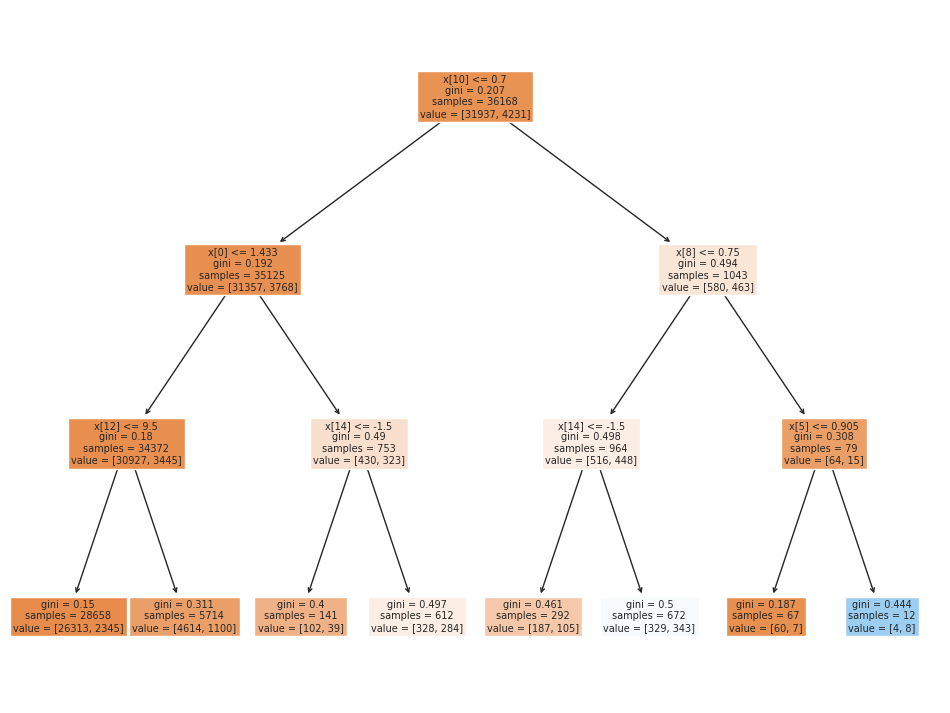

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,9))
plot_tree(dt, filled=True)
plt.show()

In [47]:
# information gain

for i, col in enumerate(X_train.columns):
  print(col,': ', dt.feature_importances_[i])

age :  0.2947224947505119
job :  0.0
marital :  0.0
education :  0.0
default :  0.0
balance :  0.011905863954420637
housing :  0.0
loan :  0.0
contact :  0.020417389065137084
day :  0.0
month :  0.42488267225582355
campaign :  0.0
pdays :  0.2160264356152485
previous :  0.0
poutcome :  0.03204514435885832


## Test

In [48]:
X_test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']] = oe.fit_transform(X_test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
y_test_e = le.transform(y_test)
X_test_s = rs.transform(X_test)

y_pred_dt = dt.predict(X_test_s)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
  print('accuracy: ', accuracy_score(y_true, y_pred))
  print('precision: ', precision_score(y_true, y_pred, average=aver))
  print('recall: ', recall_score(y_true, y_pred, average=aver))
  print('f1: ', f1_score(y_true, y_pred, average=aver))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Predicted', ylabel='Actual')
  plt.figure(figsize=(1,1))
  plt.show()

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=SEED, max_depth=3)
rf.fit(X_train_s, y_train_e)

RandomForestClassifier(max_depth=3, random_state=42)

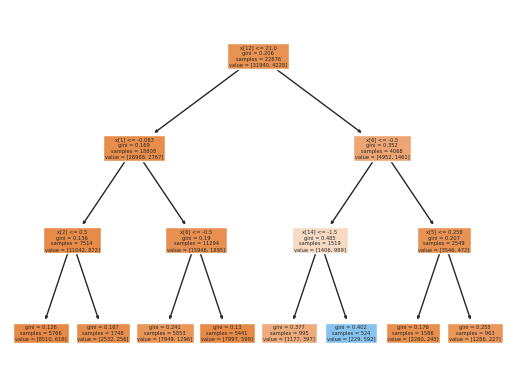

In [51]:
plot_tree(rf.estimators_[0], filled=True)
plt.show()

In [52]:
y_pred_rf = rf.predict(X_test_s)

## SVM

In [53]:
from sklearn.svm import SVC

svc = SVC(random_state=SEED) # Hyper parameter: c, kernel, degree, gamma
svc.fit(X_train_s, y_train_e)

SVC(random_state=42)

In [54]:
y_pred_svc = svc.predict(X_test_s)

## 모델 별 비교

*****Decision Tree*****
accuracy:  0.8838880902355413
precision:  0.706649771625508
recall:  0.5394483157811255
f1:  0.5454482350553209


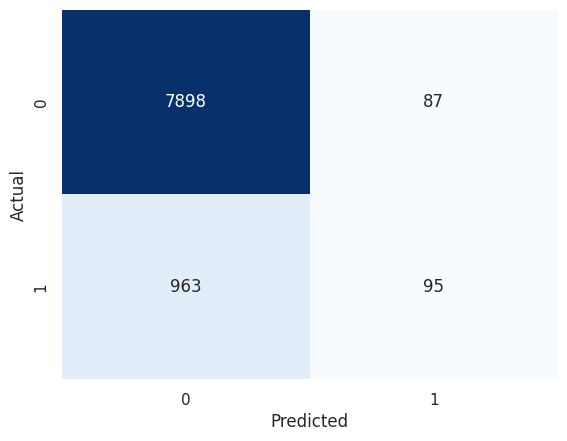

<Figure size 100x100 with 0 Axes>


*****Random Forest*****
accuracy:  0.8833351763795201
precision:  0.9416482300884956
recall:  0.5014177693761814
f1:  0.47184367392300225


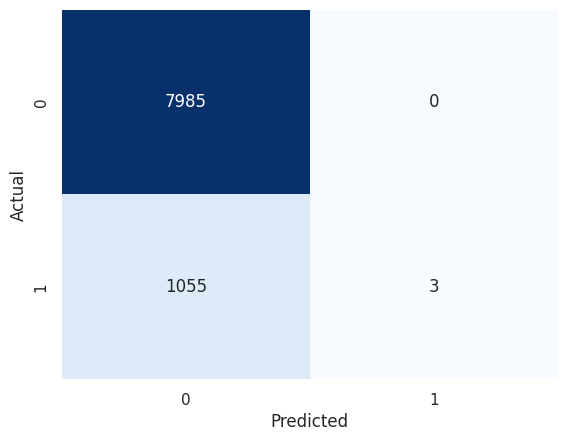

<Figure size 100x100 with 0 Axes>


*****SVM*****
accuracy:  0.8824505142098861
precision:  0.6488756952786088
recall:  0.5046065815748574
f1:  0.47977301332677563


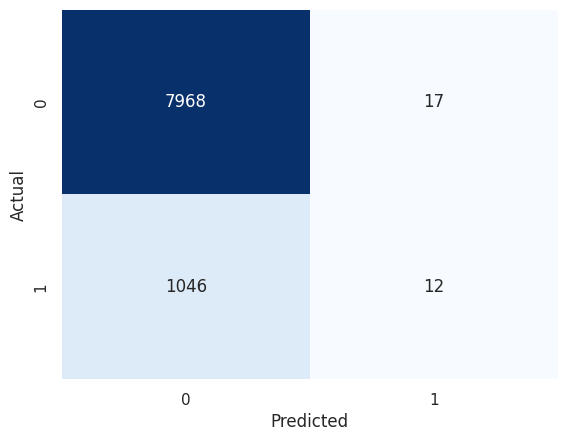

<Figure size 100x100 with 0 Axes>

In [55]:
print('*****Decision Tree*****')
print_metrics(y_test_e, y_pred_dt, 'macro')

print('\n*****Random Forest*****')
print_metrics(y_test_e, y_pred_rf, 'macro')

print('\n*****SVM*****')
print_metrics(y_test_e, y_pred_svc, 'macro')